# Практическая работа №9. Генерация сигналов и преобразования Фурье

# Блок №1. Базовый уровень

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import spectrogram

## **Задание 1: Генерация сигналов**



В этом задании вам нужно создать различные виды сигналов. Сигналы являются основой цифровой обработки сигналов, и умение их генерировать является важным навыком.













1. **Синусоидальный сигнал**: Синусоидальный сигнал можно представить как $A \sin(2\pi ft + \phi)$, где $A$ - амплитуда, $f$ - частота, $\phi$ - фаза.

- Создайте функцию, которая принимает эти параметры, а также длительность сигнала, и возвращает сгенерированный сигнал.

### Пример:



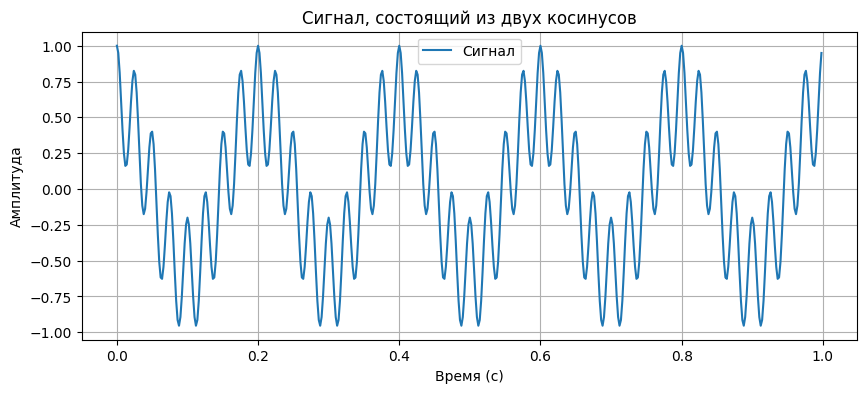

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Параметры времени
T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
t = np.arange(0, T, 1/fs) # массив времени

# Создание сигнала
f1 = 5.0        # частота первого косинуса
f2 = 40.0       # частота второго косинуса
a1 = 0.6        # амплитуда первого косинуса
a2 = 0.4        # амплитуда второго косинуса
signal = a1*np.cos(2*np.pi*f1*t) + a2*np.cos(2*np.pi*f2*t)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал, состоящий из двух косинусов')
plt.legend()
plt.grid(True)
plt.show()


### Ваш код:

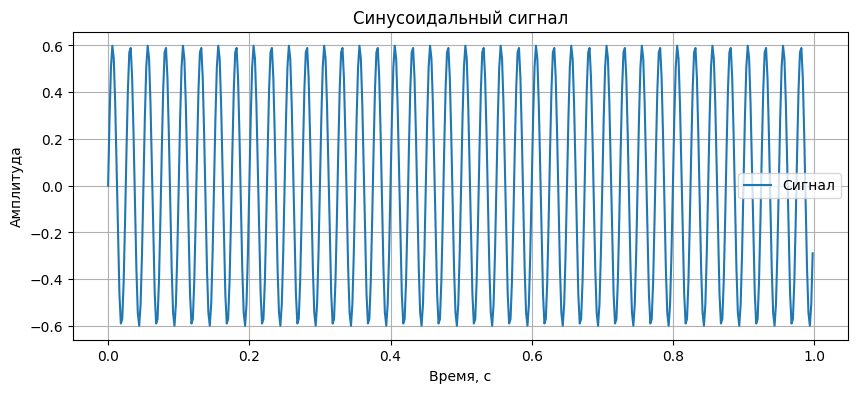

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_single_sine(T, fs, f, a, phi):
    """
    Генерирует синусоидальный сигнал вида A * sin(2 * pi * f * t + phi).
    
    Аргументы:
        T (float): длительность сигнала в секундах
        fs (float): частота дискретизации (выборок в секунду)
        f (float): частота синуса
        a (float): амплитуда синуса
        phi (float): фаза синуса
    
    Возвращает:
        tuple: (t, signal) — массив времени и сгенерированный сигнал
    """
    # Массив времени
    t = np.arange(0, T, 1/fs)
    
    # Генерация сигнала
    signal = a * np.sin(2 * np.pi * f * t + phi)
    
    return t, signal

# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
f = 40.0  # частота синуса
a = 0.6   # амплитуда синуса
phi = 0.0  # фаза синуса

# Генерация сигнала
t, signal = generate_single_sine(T, fs, f, a, phi)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Синусоидальный сигнал')
plt.legend()
plt.grid(True)
plt.show()

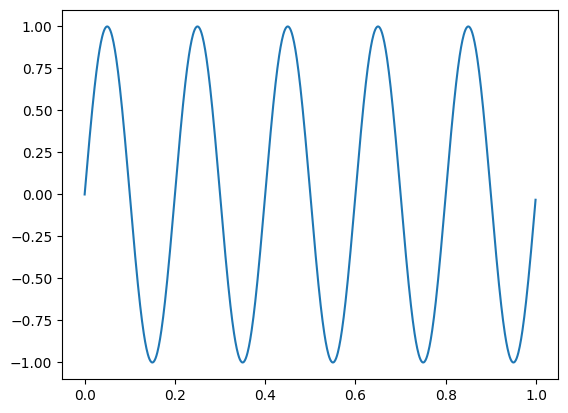

In [ ]:
# Пример

2. **Сумма синусоид**: Сигнал, состоящий из суммы двух синусоид, можно представить как $A_1 \sin(2\pi f_1t + \phi_1) + A_2 \sin(2\pi f_2t + \phi_2)$.

- Создайте функцию, которая принимает параметры для двух синусоид, а также длительность сигнала, и возвращает сгенерированный сигнал.

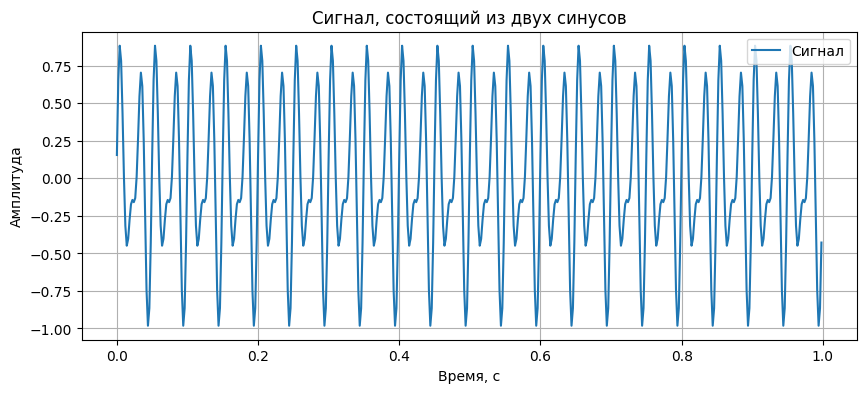

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_signal(T, fs, f1, f2, a1, a2, phi1, phi2):
    """
    Генерирует сигнал как сумму двух синусов.
    
    Аргументы:
        T (float): длительность сигнала в секундах
        fs (float): частота дискретизации (выборок в секунду)
        f1 (float): частота первого синуса
        f2 (float): частота второго синуса
        a1 (float): амплитуда первого синуса
        a2 (float): амплитуда второго синуса
        phi1 (float): фаза первого синуса
        phi2 (float): фаза второго синуса
    
    Возвращает:
        numpy.ndarray: сгенерированный сигнал
    """
    # Массив времени
    t = np.arange(0, T, 1/fs)
    
    # Генерация сигнала
    signal = a1 * np.sin(2 * np.pi * f1 * t + phi1) + a2 * np.sin(2 * np.pi * f2 * t + phi2)
    
    return t, signal

# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
f1 = 40.0  # частота первого синуса
f2 = 60.0  # частота второго синуса
a1 = 0.6   # амплитуда первого синуса
a2 = 0.4   # амплитуда второго синуса
phi1 = 0.0  # фаза первого синуса
phi2 = 0.4  # фаза второго синуса

# Генерация сигнала
t, signal = generate_sine_signal(T, fs, f1, f2, a1, a2, phi1, phi2)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Сигнал, состоящий из двух синусов')
plt.legend()
plt.grid(True)
plt.show()

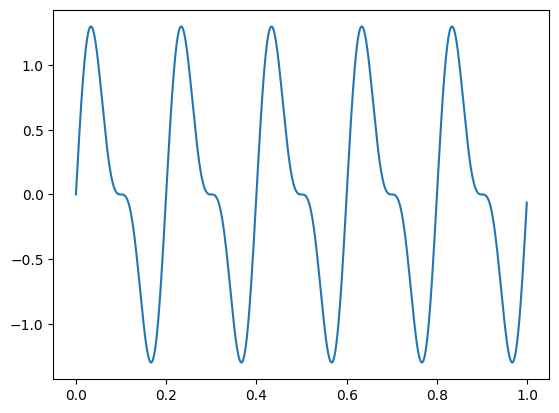

In [ ]:
# Пример

3. **Шумовой сигнал**: Шумовой сигнал (или белый шум) можно сгенерировать как случайные значения из нормального распределения.

- Создайте функцию, которая принимает амплитуду шума и длительность сигнала, и возвращает сгенерированный шумовой сигнал.

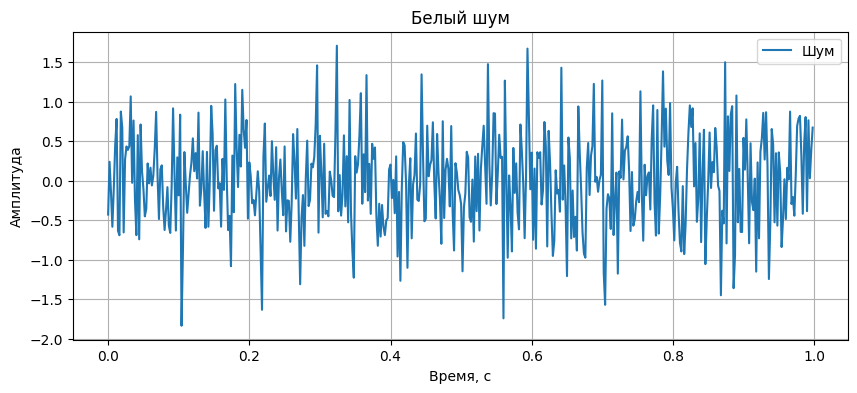

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_white_noise(T, fs, amplitude):
    """
    Генерирует белый шум с заданной амплитудой и длительностью.
    
    Аргументы:
        T (float): длительность сигнала в секундах
        fs (float): частота дискретизации (выборок в секунду)
        amplitude (float): амплитуда шума (стандартное отклонение)
    
    Возвращает:
        tuple: (t, noise) — массив времени и сгенерированный шум
    """
    # Массив времени
    t = np.arange(0, T, 1/fs)
    
    # Генерация белого шума (нормальное распределение)
    noise = np.random.normal(0, amplitude, len(t))
    
    return t, noise

# Параметры шума
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
amplitude = 0.6  # амплитуда шума

# Генерация шума
t, noise = generate_white_noise(T, fs, amplitude)

# Визуализация шума
plt.figure(figsize=(10, 4))
plt.plot(t, noise, label='Шум')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Белый шум')
plt.legend()
plt.grid(True)
plt.show()

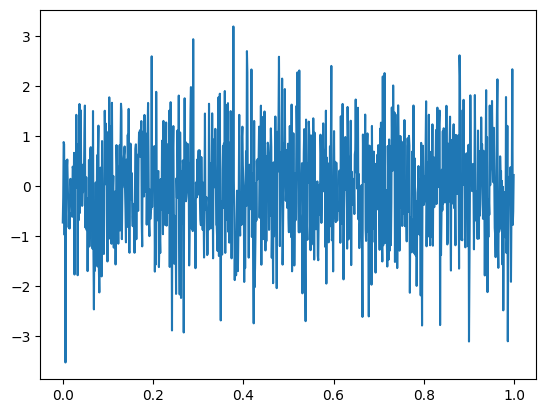

In [ ]:
# Пример

4. **Синусоида плюс шум**: Сигнал, который представляет собой сумму синусоиды и шума, можно сгенерировать путем сложения синусоидального и шумового сигналов.
- Создайте функцию, которая принимает параметры для синусоиды и шума, а также длительность сигнала, и возвращает сгенерированный сигнал.

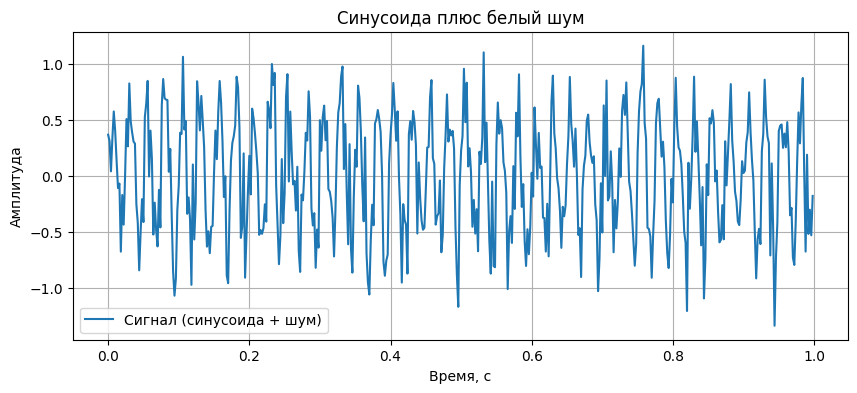

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_single_sine(T, fs, f, a, phi):
    """
    Генерирует синусоидальный сигнал вида A * sin(2 * pi * f * t + phi).
    
    Аргументы:
        T (float): длительность сигнала в секундах
        fs (float): частота дискретизации (выборок в секунду)
        f (float): частота синуса
        a (float): амплитуда синуса
        phi (float): фаза синуса
    
    Возвращает:
        tuple: (t, signal) — массив времени и сгенерированный сигнал
    """
    t = np.arange(0, T, 1/fs)
    signal = a * np.sin(2 * np.pi * f * t + phi)
    return t, signal

def generate_white_noise(T, fs, amplitude):
    """
    Генерирует белый шум с заданной амплитудой и длительностью.
    
    Аргументы:
        T (float): длительность сигнала в секундах
        fs (float): частота дискретизации (выборок в секунду)
        amplitude (float): амплитуда шума (стандартное отклонение)
    
    Возвращает:
        tuple: (t, noise) — массив времени и сгенерированный шум
    """
    t = np.arange(0, T, 1/fs)
    noise = np.random.normal(0, amplitude, len(t))
    return t, noise

def generate_sine_plus_noise(T, fs, f, a_sine, phi, a_noise):
    """
    Генерирует сигнал как сумму синусоиды и белого шума.
    
    Аргументы:
        T (float): длительность сигнала в секундах
        fs (float): частота дискретизации (выборок в секунду)
        f (float): частота синуса
        a_sine (float): амплитуда синуса
        phi (float): фаза синуса
        a_noise (float): амплитуда шума (стандартное отклонение)
    
    Возвращает:
        tuple: (t, signal) — массив времени и сгенерированный сигнал
    """
    # Генерация синусоиды
    t, sine_signal = generate_single_sine(T, fs, f, a_sine, phi)
    
    # Генерация шума
    _, noise = generate_white_noise(T, fs, a_noise)
    
    # Суммирование сигналов
    signal = sine_signal + noise
    
    return t, signal

# Параметры сигнала
T = 1.0  # длительность сигнала в секундах
fs = 500.0  # частота дискретизации (выборок в секунду)
f = 40.0  # частота синуса
a_sine = 0.6  # амплитуда синуса
phi = 0.0  # фаза синуса
a_noise = 0.3  # амплитуда шума

# Генерация сигнала
t, signal = generate_sine_plus_noise(T, fs, f, a_sine, phi, a_noise)

# Визуализация сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал (синусоида + шум)')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Синусоида плюс белый шум')
plt.legend()
plt.grid(True)
plt.show()

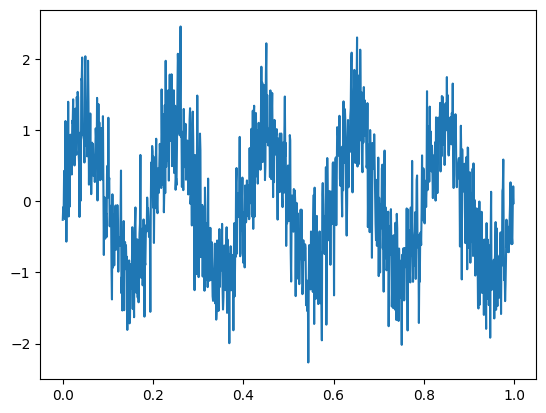

In [ ]:
# Пример

## **Задание 2: Преобразование Фурье**


Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Это основной инструмент для анализа сигналов. Создайте функцию, которая принимает сигнал и возвращает его преобразование Фурье.


1. Примените преобразование Фурье к синусоидальному сигналу и визуализируйте результат.


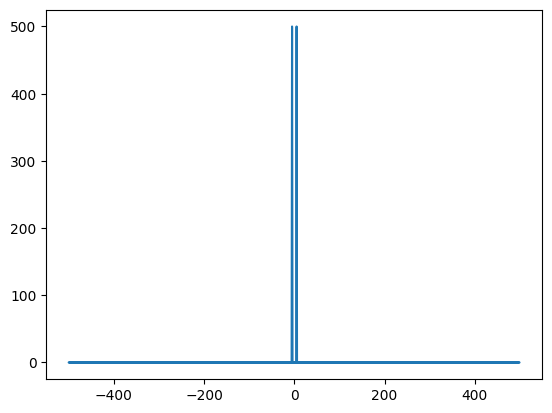

In [ ]:
# Пример

2. Примените преобразование Фурье к сигналу, состоящему из суммы двух синусоид, и визуализируйте результат.


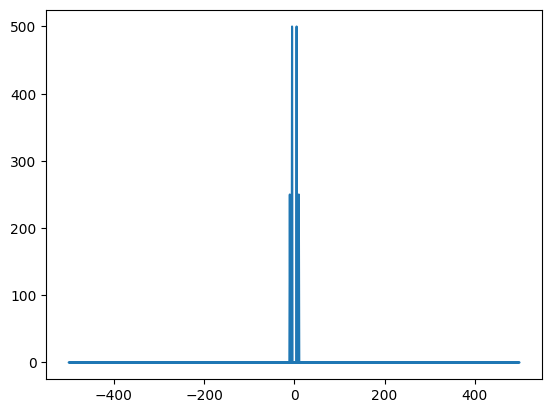

In [ ]:
# Пример

3. Примените преобразование Фурье к шумовому сигналу и визуализируйте результат.


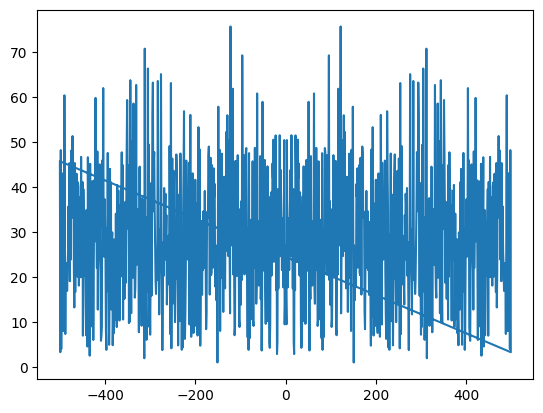

In [ ]:
# Пример

4. Примените преобразование Фурье к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результат.

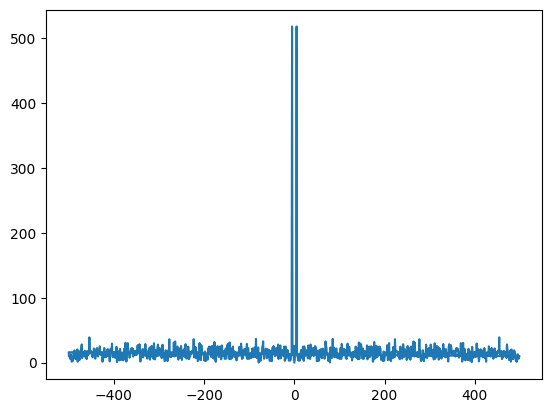

In [ ]:
# Пример

## **Задание 3: Фильтрация сигналов**

Фильтрация сигналов позволяет улучшить качество сигнала, убрав нежелательные частоты. Создайте функцию, которая принимает сигнал и частоту среза, и возвращает отфильтрованный сигнал.




1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.

In [ ]:
# Пример

2. Примените эту функцию к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результаты до и после фильтрации.

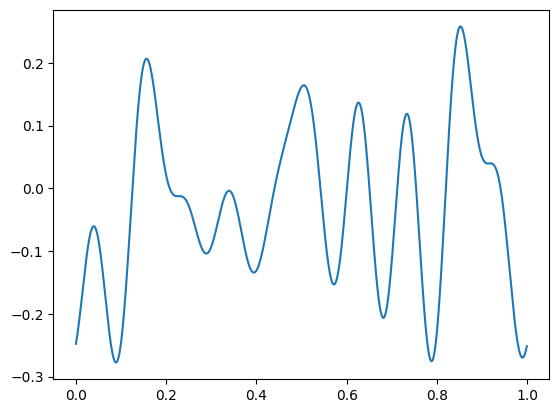

In [ ]:
# Пример

## **Задание 4: Анализ сигналов**

Анализ сигналов включает в себя различные методы и техники для изучения и понимания сигналов. Создайте функцию, которая принимает сигнал и возвращает его спектрограмму (**scipy.signal.spectrogram**).


**Спектрограмма** - это визуальное представление спектра частот сигнала во времени. Она показывает, какие частоты присутствуют в сигнале в каждый момент времени. Вот как правильно понимать спектрограмму:

- **Ось X**: Это время. Она показывает продолжительность сигнала. Каждый столбец на спектрограмме представляет собой отдельный момент времени.

- **Ось Y**: Это частота. Она показывает различные частоты, которые присутствуют в сигнале. Каждая строка на спектрограмме представляет собой отдельную частоту.

- **Значение**: Значение в каждой точке (x, y) показывает амплитуду (или интенсивность) данной частоты в данное время. Обычно более яркие цвета означают большую амплитуду, а более темные цвета - меньшую амплитуду.

Таким образом, спектрограмма позволяет вам видеть, как меняется спектральный состав сигнала во времени. Это может быть полезно во многих областях, включая анализ речи, музыку, радиосигналы и многое другое. Например, в анализе речи вы можете видеть, как меняются форманты (основные частоты) во время произношения различных звуков. В музыке вы можете видеть, как меняются ноты во время проигрывания песни.

1. Создайте функцию для вычисления и визуализации спектрограммы сигнала.


2. Примените эту функцию к различным сигналам, которые вы сгенерировали и проанализировали в предыдущих заданиях.

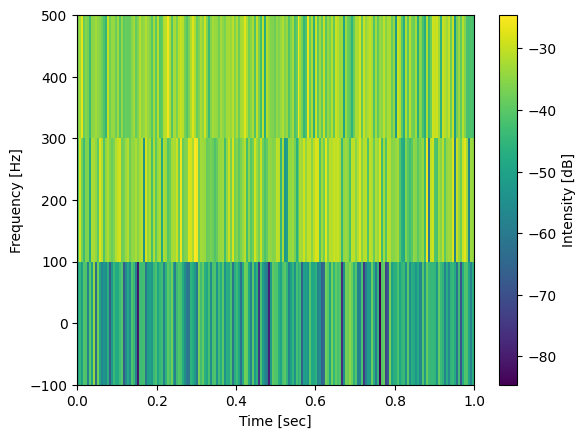

In [ ]:
# Пример

# Блок №2. Повышенный уровень

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.io import wavfile

## **Задание 1: Чтение и визуализация звукового файла**











В этом задании вам нужно использовать функцию `wavfile.read` из модуля `scipy.io` для чтения звукового файла. Эта функция возвращает частоту дискретизации и данные аудиосигнала. Затем вы должны визуализировать эти данные с помощью `matplotlib.pyplot.plot`. В результате вы получите график амплитуды звукового сигнала во времени.

1. Используйте библиотеку `scipy.io.wavfile` для чтения звукового файла.

2. Визуализируйте временную форму звукового сигнала.

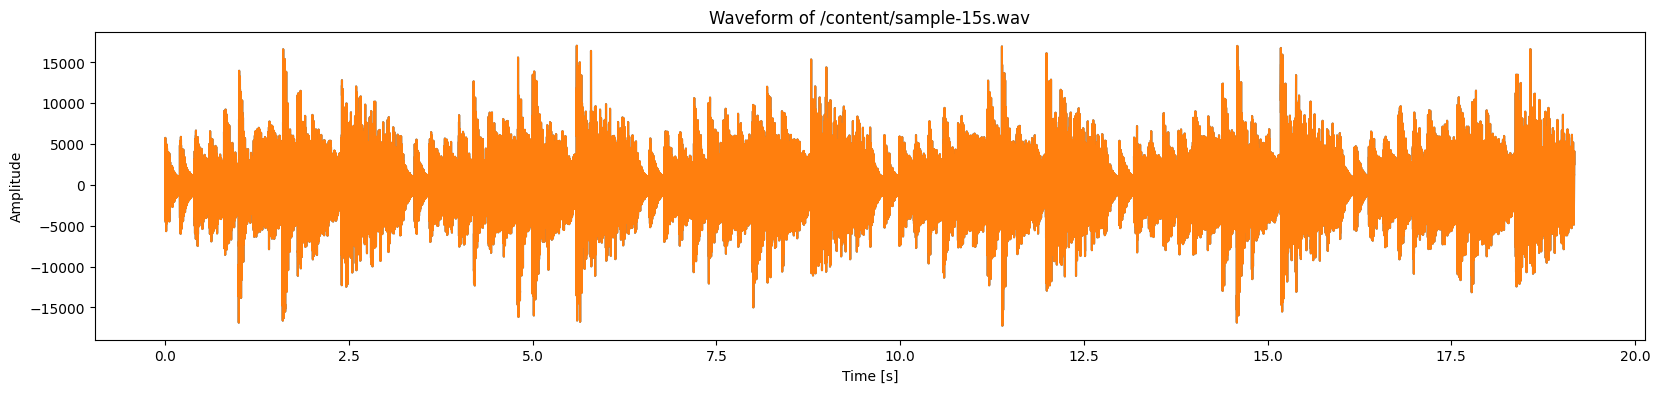

In [ ]:
# Пример

## **Задание 2: Применение преобразования Фурье**



Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Для его применения вы можете использовать функцию `fft` из модуля `scipy.fft`. Эта функция возвращает комплексные коэффициенты преобразования Фурье, которые затем можно визуализировать.

1. Примените преобразование Фурье к звуковому сигналу и визуализируйте спектр.

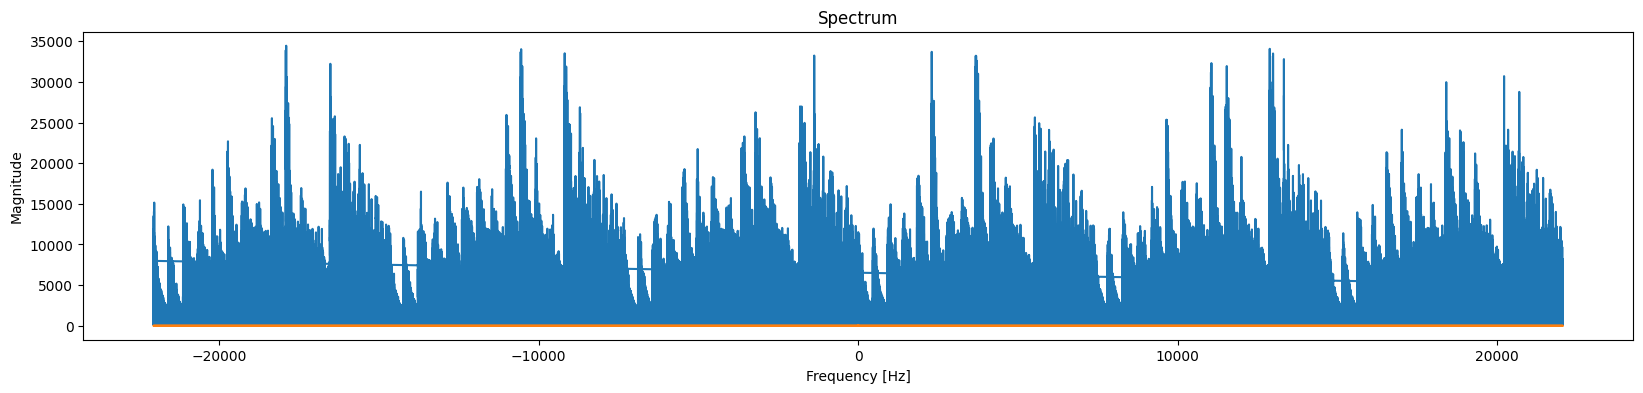

In [ ]:
# Пример

## **Задание 3: Фильтрация сигнала**



Фильтрация сигнала позволяет улучшить качество звука, убрав нежелательные частоты. Для этого вы можете использовать преобразование Фурье, затем обнулить некоторые из его коэффициентов и выполнить обратное преобразование Фурье с помощью функции `ifft` из модуля `scipy.fft`.

1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.


2. Примените эту функцию к звуковому сигналу и визуализируйте результаты до и после фильтрации.

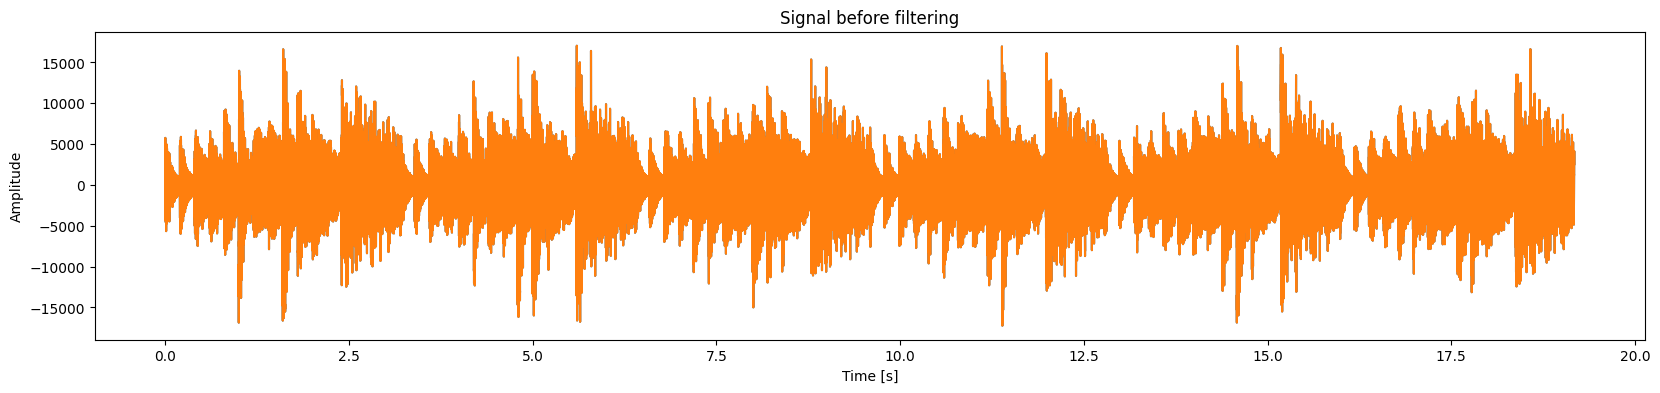

In [ ]:
# Визуализация сигнала до фильтрации

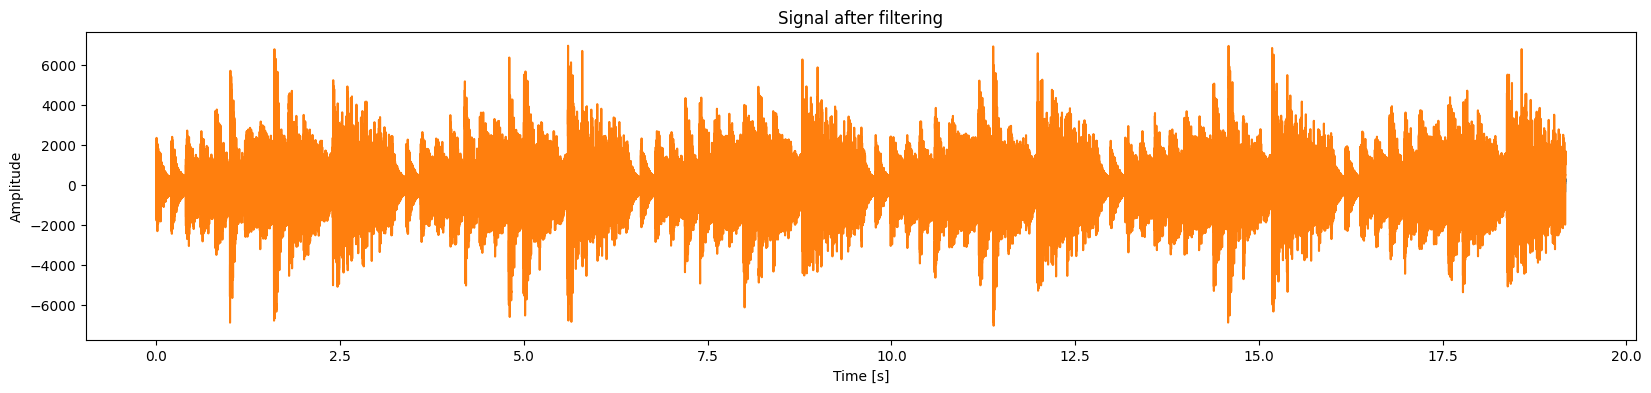

In [ ]:
# Визуализация сигнала после фильтрации

## **Задание 4: Обратное преобразование Фурье**



После фильтрации сигнала вы можете применить обратное преобразование Фурье для получения отфильтрованного звукового сигнала во временной области. Затем вы можете сохранить этот сигнал в новый звуковой файл с помощью функции `wavfile.write` из модуля `scipy.io`.

1. Примените обратное преобразование Фурье к отфильтрованному сигналу.


2. Сохраните полученный сигнал в новый звуковой файл.